In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import fitsio as ft
import numpy as np

In [2]:
plt.rc('font', size=20)

Text(0.5, 1.0, 'NGC')

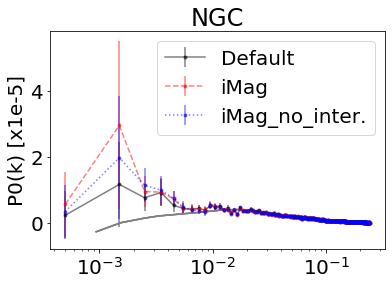

In [3]:
path  = '/home/mehdi/data/eboss/v7_1/results_NGC/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['Default', 'iMag', 'iMag_no_inter.']
mk    = ['.', '.', '.']
c = ['k', 'r', 'b']
ls = ['-', '--', ':']
for i,branch in enumerate(['systot', 'systot0.1', 'systot0.2']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

#plt.ylim(-0.5, 2.)    
plt.legend()
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC')